# Uber DataFrame
- This notebook combines multiple Market indicators into one massive DataFrame
- That DataFrame will be used for Machine Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Fetch-Data" data-toc-modified-id="Fetch-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fetch Data</a></span></li><li><span><a href="#Explore-Data" data-toc-modified-id="Explore-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore Data</a></span></li><li><span><a href="#Trim--Common-Date-Span" data-toc-modified-id="Trim--Common-Date-Span-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Trim  Common Date Span</a></span></li><li><span><a href="#Build-UBER-DataFrame" data-toc-modified-id="Build-UBER-DataFrame-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build UBER DataFrame</a></span></li><li><span><a href="#Visualize-the-dependencies" data-toc-modified-id="Visualize-the-dependencies-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualize the dependencies</a></span></li><li><span><a href="#Divide-Training-and-Prediction-data-sets" data-toc-modified-id="Divide-Training-and-Prediction-data-sets-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Divide Training and Prediction data sets</a></span><ul class="toc-item"><li><span><a href="#Save-Datasets" data-toc-modified-id="Save-Datasets-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Save Datasets</a></span></li></ul></li></ul></div>

## Set Up

In [1]:
dir="../Data/processed/"
dataset_file_name = "uber.csv"

include("../Julia/functions.jl") 
include("../Julia/IndicatorData.jl") 
include("../Julia/function_format_rata_die_to_us_date.jl")
include("../Julia/function_trim_DataFrames.jl")
println()

## Fetch Data

In [2]:
data = Dict{String, IndicatorData}()

## Do NOT use "^" in names as in "^VIX"
addIndicator!(data, "AAPL", "AAPL.csv" )
addIndicator!(data, "VIX", "^VIX.csv" )
addIndicator!(data, "DJIA", "^DJI.csv" )
addIndicator!(data, "US_ISM_MFC_EMP", "united-states.ism-manufacturing-employment.csv" )
addIndicator!(data, "US_HOUS_SRTS_M", "united-states.housing-starts-mm.csv" )
addIndicator!(data, "US_ISM_MFC_PMI", "united-states.ism-manufacturing-pmi.csv" )

print()

Fetched ../Data/processed/AAPL.csv, record count 14610
Fetched ../Data/processed/^VIX.csv, record count 11326
Fetched ../Data/processed/^DJI.csv, record count 13125
Fetched ../Data/processed/united-states.ism-manufacturing-employment.csv, record count 2622
Fetched ../Data/processed/united-states.housing-starts-mm.csv, record count 1879
Fetched ../Data/processed/united-states.ism-manufacturing-pmi.csv, record count 5059


## Explore Data

In [3]:
data

Dict{String,IndicatorData} with 6 entries:
  "VIX"            => IndicatorData("VIX", "^VIX.csv", 11326×10 DataFrame. Omit…
  "US_ISM_MFC_PMI" => IndicatorData("US_ISM_MFC_PMI", "united-states.ism-manufa…
  "DJIA"           => IndicatorData("DJIA", "^DJI.csv", 13125×10 DataFrame. Omi…
  "AAPL"           => IndicatorData("AAPL", "AAPL.csv", 14610×9 DataFrame. Omit…
  "US_ISM_MFC_EMP" => IndicatorData("US_ISM_MFC_EMP", "united-states.ism-manufa…
  "US_HOUS_SRTS_M" => IndicatorData("US_HOUS_SRTS_M", "united-states.housing-st…

In [4]:
data["AAPL"].min_rata_die

723161

In [5]:
using Statistics
describe(data["AAPL"].df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Rata_Die,730466.0,723161,730466.0,737770,,,Int64
2,Date,,1980-12-12,,2020-12-11,14610,,Date
3,Original,9.86384,0.0,0.448929,137.98,,,Float64
4,Quantized,-109.75,-128.0,-127.0,127.0,,,Float64
5,Avg030,-109.718,-128.0,-127.0,99.87,,,Float64
6,Avg060,-109.68,-128.0,-127.0,93.25,,,Float64
7,Avg090,-109.64,-128.0,-127.0,91.8,,,Float64
8,Avg120,-109.602,-128.0,-127.0,92.02,,,Float64
9,Avg180,-109.507,-128.0,-127.0,78.98,,,Float64


## Trim  Common Date Span

Example:
- for all the DataFrames
- find lowest dates
- select the highest (common) of them

In [6]:
trim_DataFrames!(data) # include("../Julia/function_trim_DataFrames.jl")

 - VIX min_rata_die = 726469
 - US_ISM_MFC_PMI min_rata_die = 732736
 - DJIA min_rata_die = 724670
 - AAPL min_rata_die = 723161
 - US_ISM_MFC_EMP min_rata_die = 735173
 - US_HOUS_SRTS_M min_rata_die = 735975
oldest = 735975 Int64
 - VIX max_rata_die = 737794
 - US_ISM_MFC_PMI max_rata_die = 737794
 - DJIA max_rata_die = 737794
 - AAPL max_rata_die = 737770
 - US_ISM_MFC_EMP max_rata_die = 737794
 - US_HOUS_SRTS_M max_rata_die = 737795
newest = 737770 Int64
 - BEFORE VIX size (11326, 10)
 - AFTER  VIX size (1796, 10)
 - BEFORE US_ISM_MFC_PMI size (5059, 9)
 - AFTER  US_ISM_MFC_PMI size (1796, 9)
 - BEFORE DJIA size (13125, 10)
 - AFTER  DJIA size (1796, 10)
 - BEFORE AAPL size (14610, 9)
 - AFTER  AAPL size (1796, 9)
 - BEFORE US_ISM_MFC_EMP size (2622, 10)
 - AFTER  US_ISM_MFC_EMP size (1796, 10)
 - BEFORE US_HOUS_SRTS_M size (1879, 9)
 - AFTER  US_HOUS_SRTS_M size (1854, 9)


## Build UBER DataFrame

In [7]:
## Print POSSIBLE fields for UBER DataFrame

for key in keys(data) 
    #df = data[key].df
    columns = names(data[key].df)
    for i in 1:length(columns)
        println(",", data[key].name, "_",columns[i], " = data[\"", data[key].name, "\"].df[:,:", columns[i], "] ") 
    end
end

,VIX_Rata_Die = data["VIX"].df[:,:Rata_Die] 
,VIX_Date = data["VIX"].df[:,:Date] 
,VIX_Original = data["VIX"].df[:,:Original] 
,VIX_Quantized = data["VIX"].df[:,:Quantized] 
,VIX_Avg030 = data["VIX"].df[:,:Avg030] 
,VIX_Avg060 = data["VIX"].df[:,:Avg060] 
,VIX_Avg090 = data["VIX"].df[:,:Avg090] 
,VIX_Avg120 = data["VIX"].df[:,:Avg120] 
,VIX_Avg180 = data["VIX"].df[:,:Avg180] 
,VIX_Avg365 = data["VIX"].df[:,:Avg365] 
,US_ISM_MFC_PMI_Rata_Die = data["US_ISM_MFC_PMI"].df[:,:Rata_Die] 
,US_ISM_MFC_PMI_Date = data["US_ISM_MFC_PMI"].df[:,:Date] 
,US_ISM_MFC_PMI_Original = data["US_ISM_MFC_PMI"].df[:,:Original] 
,US_ISM_MFC_PMI_Quantized = data["US_ISM_MFC_PMI"].df[:,:Quantized] 
,US_ISM_MFC_PMI_Avg030 = data["US_ISM_MFC_PMI"].df[:,:Avg030] 
,US_ISM_MFC_PMI_Avg060 = data["US_ISM_MFC_PMI"].df[:,:Avg060] 
,US_ISM_MFC_PMI_Avg090 = data["US_ISM_MFC_PMI"].df[:,:Avg090] 
,US_ISM_MFC_PMI_Avg180 = data["US_ISM_MFC_PMI"].df[:,:Avg180] 
,US_ISM_MFC_PMI_Avg365 = data["US_ISM_MFC_PMI"].df[:,:Avg365] 
,DJ

In [8]:
using DataFrames
uber = DataFrame(  

 Rata_Die = data["DJIA"].df[:,:Rata_Die] # Array{Int64,1}
,Date = data["DJIA"].df[:,:Date] 
    
,VIX_Original = data["VIX"].df[:,:Original] 
,VIX_Quantized = data["VIX"].df[:,:Quantized] 
,VIX_Avg030 = data["VIX"].df[:,:Avg030] 
,VIX_Avg060 = data["VIX"].df[:,:Avg060] 
,VIX_Avg090 = data["VIX"].df[:,:Avg090] 
,VIX_Avg120 = data["VIX"].df[:,:Avg120] 
,VIX_Avg180 = data["VIX"].df[:,:Avg180] 
,VIX_Avg365 = data["VIX"].df[:,:Avg365] 
    
,US_ISM_MFC_PMI_Original = data["US_ISM_MFC_PMI"].df[:,:Original] 
,US_ISM_MFC_PMI_Quantized = data["US_ISM_MFC_PMI"].df[:,:Quantized] 
,US_ISM_MFC_PMI_Avg030 = data["US_ISM_MFC_PMI"].df[:,:Avg030] 
,US_ISM_MFC_PMI_Avg060 = data["US_ISM_MFC_PMI"].df[:,:Avg060] 
,US_ISM_MFC_PMI_Avg090 = data["US_ISM_MFC_PMI"].df[:,:Avg090] 
,US_ISM_MFC_PMI_Avg180 = data["US_ISM_MFC_PMI"].df[:,:Avg180] 
,US_ISM_MFC_PMI_Avg365 = data["US_ISM_MFC_PMI"].df[:,:Avg365] 

,DJIA_Original = data["DJIA"].df[:,:Original] 
,DJIA_Quantized = data["DJIA"].df[:,:Quantized] 
,DJIA_Avg030 = data["DJIA"].df[:,:Avg030] 
,DJIA_Avg060 = data["DJIA"].df[:,:Avg060] 
,DJIA_Avg090 = data["DJIA"].df[:,:Avg090] 
,DJIA_Avg120 = data["DJIA"].df[:,:Avg120] 
,DJIA_Avg180 = data["DJIA"].df[:,:Avg180] 
,DJIA_Avg365 = data["DJIA"].df[:,:Avg365] 

,AAPL_Original = data["AAPL"].df[:,:Original] 
,AAPL_Quantized = data["AAPL"].df[:,:Quantized] 
,AAPL_Avg030 = data["AAPL"].df[:,:Avg030] 
,AAPL_Avg060 = data["AAPL"].df[:,:Avg060] 
,AAPL_Avg090 = data["AAPL"].df[:,:Avg090] 
,AAPL_Avg120 = data["AAPL"].df[:,:Avg120] 
,AAPL_Avg180 = data["AAPL"].df[:,:Avg180] 

,US_ISM_MFC_EMP_Original = data["US_ISM_MFC_EMP"].df[:,:Original] 
,US_ISM_MFC_EMP_Quantized = data["US_ISM_MFC_EMP"].df[:,:Quantized] 
,US_ISM_MFC_EMP_Avg030 = data["US_ISM_MFC_EMP"].df[:,:Avg030] 
,US_ISM_MFC_EMP_Avg060 = data["US_ISM_MFC_EMP"].df[:,:Avg060] 
,US_ISM_MFC_EMP_Avg090 = data["US_ISM_MFC_EMP"].df[:,:Avg090] 
,US_ISM_MFC_EMP_Avg120 = data["US_ISM_MFC_EMP"].df[:,:Avg120] 
,US_ISM_MFC_EMP_Avg180 = data["US_ISM_MFC_EMP"].df[:,:Avg180] 
,US_ISM_MFC_EMP_Avg365 = data["US_ISM_MFC_EMP"].df[:,:Avg365] 

#,US_HOUS_SRTS_M_Original = data["US_HOUS_SRTS_M"].df[:,:Original] 
#,US_HOUS_SRTS_M_Quantized = data["US_HOUS_SRTS_M"].df[:,:Quantized] 
#,US_HOUS_SRTS_M_Avg030 = data["US_HOUS_SRTS_M"].df[:,:Avg030] 
#,US_HOUS_SRTS_M_Avg060 = data["US_HOUS_SRTS_M"].df[:,:Avg060] 
#,US_HOUS_SRTS_M_Avg090 = data["US_HOUS_SRTS_M"].df[:,:Avg090] 
#,US_HOUS_SRTS_M_Avg180 = data["US_HOUS_SRTS_M"].df[:,:Avg180] 
#,US_HOUS_SRTS_M_Avg365 = data["US_HOUS_SRTS_M"].df[:,:Avg365] 
)
using Statistics
describe(uber_df)

UndefVarError: UndefVarError: uber_df not defined

## Visualize the dependencies

In [9]:
columns = print_colunms(uber)
println()

1 Rata_Die
2 Date
3 VIX_Original
4 VIX_Quantized
5 VIX_Avg030
6 VIX_Avg060
7 VIX_Avg090
8 VIX_Avg120
9 VIX_Avg180
10 VIX_Avg365
11 US_ISM_MFC_PMI_Original
12 US_ISM_MFC_PMI_Quantized
13 US_ISM_MFC_PMI_Avg030
14 US_ISM_MFC_PMI_Avg060
15 US_ISM_MFC_PMI_Avg090
16 US_ISM_MFC_PMI_Avg180
17 US_ISM_MFC_PMI_Avg365
18 DJIA_Original
19 DJIA_Quantized
20 DJIA_Avg030
21 DJIA_Avg060
22 DJIA_Avg090
23 DJIA_Avg120
24 DJIA_Avg180
25 DJIA_Avg365
26 AAPL_Original
27 AAPL_Quantized
28 AAPL_Avg030
29 AAPL_Avg060
30 AAPL_Avg090
31 AAPL_Avg120
32 AAPL_Avg180
33 US_ISM_MFC_EMP_Original
34 US_ISM_MFC_EMP_Quantized
35 US_ISM_MFC_EMP_Avg030
36 US_ISM_MFC_EMP_Avg060
37 US_ISM_MFC_EMP_Avg090
38 US_ISM_MFC_EMP_Avg120
39 US_ISM_MFC_EMP_Avg180
40 US_ISM_MFC_EMP_Avg365



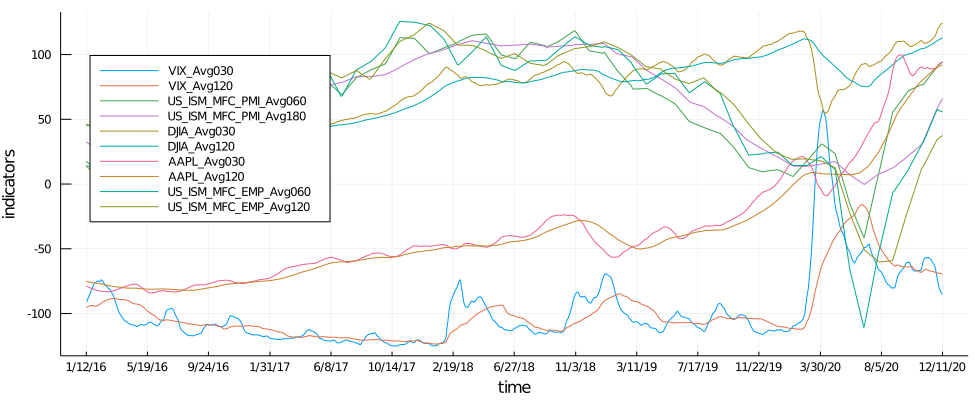

In [10]:
using Plots

record_count = size(uber)[1]
rows = 1:record_count
dates = format_dates( uber[rows,2] , "m/d/yy")

gr()
plot( dates, # x-axis: dates
     [ 
        uber[rows,5] uber[rows,8] uber[rows,14] uber[rows,16] uber[rows,20] uber[rows,23] uber[rows,28] uber[rows,31] uber[rows,36] uber[rows,38]         
    ], # y-axis
    label = [      
          columns[5]   columns[8]   columns[14]   columns[16]   columns[20]    columns[23]  columns[28]    columns[31]  columns[36]   columns[38] "" 
    ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

In [11]:
savefig("../../indicators.png")

## Divide Training and Prediction data sets

In [12]:
record_count = size(uber)[1]
today_rata = Dates.datetime2rata( today() )
today_id = find_day(uber, today_rata)

# I am putting overlap in the sets to see the behavior
df_training   = uber[1:today_id-5,:] # train up 5 days ago, I want to see real prediction for last few days.
df_prediction = uber[today_id-90:record_count,:] # show predictions up to 90 days ago

println()

### Save Datasets

In [13]:
save_dataset(df_training,   "uber_training.csv"  , "../Data/processed/");
save_dataset(df_prediction, "uber_prediction.csv", "../Data/processed/");